# Projeto 2 - Ciência dos Dados

Integrantes: 

- Anderson Franco Júnior
- Luiz Miguel Moraes Berredo
- Samuel Jabes Costa Cavalcanti
- Vinícius Rodrigues de Freitas

<div id="indice"></div>

## Índice

- [Visão Geral;](#visao_geral)
- [Análise exploratória;](#analise_explor)





##### Carregando algumas bibliotecas

In [1]:
%matplotlib inline
# A linha acima é necessária para visualizar os gráficos no jupyter notebook

import os
import pandas as pd
# Módulo com funções matemáticas para arrays multidimensionais (matrizes)
import numpy as np
# Módulo com funções de geração de gráficos
import matplotlib.pyplot as plt
# Módulo com funções de cunho estatístico
from scipy import stats

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\samue\OneDrive\Documentos\Insper\2º Semestre\Ciência dos Dados\Projeto 2\23-1a-cd-p2-anderson_samuel_vinicius


**Carregando as bases de dados**

<div id='visao_geral'></div>

# Visão Geral

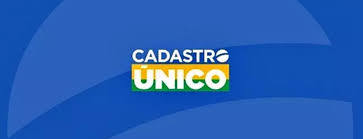

##### Objetivo
- Com a base de dados obtida acerca de conhecimentos e práticas financeiras de pessoas cadastradas no CADÚnico, o projeto que apresentaremos tem como objetivo principal aplicar modelos de classificação para compreender e analisar `os fatores que influenciam no endividamento de pessoas cadastradas no CADUnico`, sendo este o tema central deste projeto. O CADUnico (Cadastro Único para Programas Sociais do Governo Federal) é um instrumento que reúne informações socioeconômicas das famílias de baixa renda no Brasil, sendo utilizado como base para a seleção e implementação de políticas públicas.

##### Motivação
- O endividamento é uma questão preocupante e desafiadora que afeta muitas pessoas em diferentes contextos socioeconômicos. No caso específico das famílias cadastradas no CADUnico, é fundamental compreender os fatores que contribuem para esse endividamento, a fim de desenvolver estratégias eficazes para lidar com essa situação.

- Ao entender os fatores que influenciam o endividamento, é possível identificar padrões, correlações e variáveis relevantes que contribuem para o problema.

<div id='analise_explor'></div>

# Análise Exploratória

**Lendo a base de dados a visualizando seu conteúdo**

Primeiramente vamos abrir a base de dados e entender as características desta.

In [2]:
responsaveis_df = pd.read_csv('Data/Base_Responsaveis.csv', encoding='latin1', sep=';')
responsaveis_df.head(5)

,ID_DOM,CodIBGE7,CodUF,R01,R02D,R02M,R02A,R03,R04,R05,...,R93_05,R93_06,R93_99,R94_01,R94_02,R94_03,R94_04,R94_05,R97,R98
0,1,1101476,11,2,4,2,1977,2,5,1,...,,,,2,2,2,2,2,1,2
1,2,1200385,12,2,6,7,1977,1,3,1,...,,,,2,2,2,2,2,1,1
2,3,2311801,23,2,22,9,1986,2,3,2,...,,,,2,2,2,2,2,1,1
3,4,2311801,23,2,14,9,1983,4,3,1,...,,,,2,2,2,2,2,2,
4,5,2311801,23,2,18,9,1976,2,2,2,...,,,,2,2,2,2,2,1,1


In [3]:
responsaveis_df.shape

(8827, 482)

In [4]:
nomes_colunas = [x.upper() for x in list(responsaveis_df.columns)]
responsaveis_df.columns = nomes_colunas
nomes_colunas

['ID_DOM',
 'CODIBGE7',
 'CODUF',
 'R01',
 'R02D',
 'R02M',
 'R02A',
 'R03',
 'R04',
 'R05',
 'R05A',
 'R06_01',
 'R07_01',
 'R08_01',
 'R09_01',
 'R06_02',
 'R07_02',
 'R08_02',
 'R09_02',
 'R06_03',
 'R07_03',
 'R08_03',
 'R09_03',
 'R10A',
 'R10B',
 'R11',
 'R12',
 'R17_01',
 'R17_02',
 'R17_03',
 'R17_04',
 'R17_05',
 'R17_06',
 'R17_07',
 'R17_08',
 'R17_09',
 'R18_01',
 'R18_02',
 'R18_03',
 'R19_01',
 'R20_01',
 'R19_02',
 'R20_02',
 'R19_03',
 'R20_03',
 'R19_04',
 'R20_04',
 'R19_05',
 'R20_05',
 'R19_06',
 'R20_06',
 'R19_07',
 'R20_07',
 'R19_08',
 'R20_08',
 'R19_09',
 'R20_09',
 'R19_10',
 'R20_10',
 'R19_11',
 'R20_11',
 'R19_12',
 'R20_12',
 'R19_13',
 'R20_13',
 'R19_14',
 'R20_14',
 'R19_15',
 'R20_15',
 'R19_16',
 'R20_16',
 'R19_17',
 'R20_17',
 'R19_18',
 'R20_18',
 'R19_98',
 'R20_98',
 'R21',
 'R22',
 'R23_01',
 'R23_02',
 'R23_03',
 'R23_04',
 'R23_05',
 'R24',
 'R25',
 'R26_01',
 'R26_02',
 'R26_03',
 'R26_04',
 'R26_05',
 'R27_01',
 'R27_02',
 'R27_03',
 'R27_0

**Manipulando as colunas do DataFrame**

Algumas colunas são referentes à mesma pergunta do questionário, vamos criar um dicionário onde cada chave é referente a uma pergunta e seu valor é uma lista de colunas associadas à pergunta.

In [5]:
col_per_quest = {}
for i in range(len(nomes_colunas)):
    in_car = nomes_colunas[i][0:3]
    if(in_car not in col_per_quest.keys()):
        col_per_quest[in_car] = [nomes_colunas[i]]
    else:
        col_per_quest[in_car].append(nomes_colunas[i])
col_per_quest

{'ID_': ['ID_DOM'],
 'COD': ['CODIBGE7', 'CODUF'],
 'R01': ['R01'],
 'R02': ['R02D', 'R02M', 'R02A'],
 'R03': ['R03'],
 'R04': ['R04'],
 'R05': ['R05', 'R05A'],
 'R06': ['R06_01', 'R06_02', 'R06_03'],
 'R07': ['R07_01', 'R07_02', 'R07_03'],
 'R08': ['R08_01', 'R08_02', 'R08_03'],
 'R09': ['R09_01', 'R09_02', 'R09_03'],
 'R10': ['R10A', 'R10B'],
 'R11': ['R11'],
 'R12': ['R12'],
 'R17': ['R17_01',
  'R17_02',
  'R17_03',
  'R17_04',
  'R17_05',
  'R17_06',
  'R17_07',
  'R17_08',
  'R17_09'],
 'R18': ['R18_01', 'R18_02', 'R18_03'],
 'R19': ['R19_01',
  'R19_02',
  'R19_03',
  'R19_04',
  'R19_05',
  'R19_06',
  'R19_07',
  'R19_08',
  'R19_09',
  'R19_10',
  'R19_11',
  'R19_12',
  'R19_13',
  'R19_14',
  'R19_15',
  'R19_16',
  'R19_17',
  'R19_18',
  'R19_98'],
 'R20': ['R20_01',
  'R20_02',
  'R20_03',
  'R20_04',
  'R20_05',
  'R20_06',
  'R20_07',
  'R20_08',
  'R20_09',
  'R20_10',
  'R20_11',
  'R20_12',
  'R20_13',
  'R20_14',
  'R20_15',
  'R20_16',
  'R20_17',
  'R20_18',
  'R

Dessas colunas que são referentes à mesma pergunta do questionário, temos que algumas correspondem a perguntas que possuem subdivisões - como itens - e que geram várias respostas. Numa leitura do questionário correspondente, identificamos as seguintes perguntas como tendo essas características:

- Pergunta 6
- Pergunta 7
- Pergunta 8
- Pergunta 9
- Pergunta 10
- Pergunta 17
- Pergunta 18
- Pergunta 19
- Pergunta 20
- Pergunta 30
- Pergunta 44
- Pergunta 54
- Pergunta 55
- Pergunta 76
- Pergunta 94

As demais são referentes às respostas de uma mesma pergunta, ou seja, cada coluna é referente a uma possível resposta de uma mesma pergunta. Neste caso,  há vários valores vazios quando o respondente não assinalou aquela alternativa.

Para evitar que isso seja um problema no futuro, vamos substituir os nulos dessas colunas pelo valor 0.

In [6]:
frag_quest = ['R06', 'R07', 'R08', 'R09', 'R10', 'R17', 'R18', 'R19', 'R20', 'R30', 'R44', 'R54', 'R55', 'R76', 'R94']

for pergunta in col_per_quest.keys():
    if len(col_per_quest[pergunta]) > 1 and pergunta not in frag_quest:
        for coluna in col_per_quest[pergunta]:
            responsaveis_df.loc[responsaveis_df[coluna] == ' ',coluna] = '0'

In [7]:
responsaveis_df

,ID_DOM,CODIBGE7,CODUF,R01,R02D,R02M,R02A,R03,R04,R05,...,R93_05,R93_06,R93_99,R94_01,R94_02,R94_03,R94_04,R94_05,R97,R98
0,1,1101476,11,2,4,2,1977,2,5,1,...,0,0,0,2,2,2,2,2,1,2
1,2,1200385,12,2,6,7,1977,1,3,1,...,0,0,0,2,2,2,2,2,1,1
2,3,2311801,23,2,22,9,1986,2,3,2,...,0,0,0,2,2,2,2,2,1,1
3,4,2311801,23,2,14,9,1983,4,3,1,...,0,0,0,2,2,2,2,2,2,
4,5,2311801,23,2,18,9,1976,2,2,2,...,0,0,0,2,2,2,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8822,8823,5006606,50,2,2,12,1968,2,2,2,...,0,0,0,2,2,2,2,2,1,1
8823,8824,3506805,35,2,29,9,1990,2,4,2,...,0,0,0,2,2,2,2,2,1,2
8824,8825,1501782,15,2,4,6,1984,2,2,2,...,0,0,0,2,2,2,2,2,1,2
8825,8826,1302603,13,2,20,6,1984,1,4,1,...,0,0,0,2,2,2,2,2,1,1


A partir de uma visualização mais humanizada dos dados, conseguimos identificar algumas perguntas (consequentemente as respostas também) que não apresentam conteúdo relevante para análise e posterior classificação acerca do tema. Assim, iremos removê-las do nosso dataframe.

In [9]:
# Lista de colunas a serem removidas
col_para_remocao = ['R05', 'R06', 'R07', 'R08', 'R09', 'R11', 'R17', 'R18', 'R23', 'R26', 'R27', 'R28', 'R31', 'R32', 'R33', 'R34', 'R36', 'R41', 'R49', 'R53', 'R60', 'R67', 'R68', 'R69', 'R70', 'R71']

per_relevantes = []                            # Aqui colocamos os nomes das colunas que contém apenas informações relevantes    
for col, respostas in col_per_quest.items():
    num_pergunta = col[0:3]                    # Basta pegar os 3 primeiros caracteres para identificar respostas referentes a uma certa pergunta
    if num_pergunta not in col_para_remocao:   # Se não estiver dentro da lista de colunas a serem removidas, é uma coluna relevante
        if len(respostas) > 1:
            for res in respostas:              # Pode ter mais de uma alternativa/resposta para a mesma pergunta
                per_relevantes.append(res)
        else:
            per_relevantes.append(respostas[0])
per_relevantes

['ID_DOM',
 'CODIBGE7',
 'CODUF',
 'R01',
 'R02D',
 'R02M',
 'R02A',
 'R03',
 'R04',
 'R10A',
 'R10B',
 'R12',
 'R19_01',
 'R19_02',
 'R19_03',
 'R19_04',
 'R19_05',
 'R19_06',
 'R19_07',
 'R19_08',
 'R19_09',
 'R19_10',
 'R19_11',
 'R19_12',
 'R19_13',
 'R19_14',
 'R19_15',
 'R19_16',
 'R19_17',
 'R19_18',
 'R19_98',
 'R20_01',
 'R20_02',
 'R20_03',
 'R20_04',
 'R20_05',
 'R20_06',
 'R20_07',
 'R20_08',
 'R20_09',
 'R20_10',
 'R20_11',
 'R20_12',
 'R20_13',
 'R20_14',
 'R20_15',
 'R20_16',
 'R20_17',
 'R20_18',
 'R20_98',
 'R21',
 'R22',
 'R24',
 'R25',
 'R29_01',
 'R29_02',
 'R29_03',
 'R29_04',
 'R29_05',
 'R29_06',
 'R29_99',
 'R30_01',
 'R30_02',
 'R30_03',
 'R30_04',
 'R30_05',
 'R30_06',
 'R30_07',
 'R30_08',
 'R30_09',
 'R30_10',
 'R35',
 'R37H',
 'R37M',
 'R38H',
 'R38M',
 'R39',
 'R40',
 'R42A',
 'R42B',
 'R42C',
 'R42D',
 'R42E',
 'R42F',
 'R42G',
 'R43A',
 'R43B',
 'R43C',
 'R43D',
 'R43E',
 'R43F',
 'R43G',
 'R44A',
 'R44B',
 'R44C',
 'R44D',
 'R44E',
 'R44F',
 'R44G',
 'R

In [10]:
# Filtrando apenas as colunas com informações relevantes
responsaveis_df = responsaveis_df.loc[:, per_relevantes]
responsaveis_df

,ID_DOM,CODIBGE7,CODUF,R01,R02D,R02M,R02A,R03,R04,R10A,...,R93_05,R93_06,R93_99,R94_01,R94_02,R94_03,R94_04,R94_05,R97,R98
0,1,1101476,11,2,4,2,1977,2,5,545,...,0,0,0,2,2,2,2,2,1,2
1,2,1200385,12,2,6,7,1977,1,3,545,...,0,0,0,2,2,2,2,2,1,1
2,3,2311801,23,2,22,9,1986,2,3,,...,0,0,0,2,2,2,2,2,1,1
3,4,2311801,23,2,14,9,1983,4,3,545,...,0,0,0,2,2,2,2,2,2,
4,5,2311801,23,2,18,9,1976,2,2,,...,0,0,0,2,2,2,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8822,8823,5006606,50,2,2,12,1968,2,2,,...,0,0,0,2,2,2,2,2,1,1
8823,8824,3506805,35,2,29,9,1990,2,4,,...,0,0,0,2,2,2,2,2,1,2
8824,8825,1501782,15,2,4,6,1984,2,2,,...,0,0,0,2,2,2,2,2,1,2
8825,8826,1302603,13,2,20,6,1984,1,4,100,...,0,0,0,2,2,2,2,2,1,1
